# Прогнозирование продаж

### *Подготовка данных*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
train = pd.read_excel('Submarinos.xlsx')

In [3]:
train.head()

,Week,Storage_ID,Canal_ID,Route_ID,Submarinos,Shipped,Returned
0,3,1110,7,3303,Chocolate,5,0
1,3,1110,7,3303,Fresa,5,0
2,3,1110,7,3303,Vainilla,5,0
3,3,1110,7,3305,Fresa,17,0
4,3,1110,7,3305,Vainilla,14,0


In [4]:
np.mean(train['Shipped'])

42.35143949716496

In [5]:
week_count = len(train['Week'].unique())

In [6]:
print('There %d weeks in data!' % week_count)

There 7 weeks in data!


In [7]:
train.shape

(113755, 7)

In [8]:
train['Storage_ID'].max()

25759

### Описание датасета

In [9]:
Route = []
for val, cnt in train.Route_ID.value_counts().to_dict().items():
    Route.append('Значение %r встречается в колонке Route_ID обучающей выборки %d раз!' % (val, cnt))

In [10]:
for i in range(5):
    print(Route[i])

Значение 2802 встречается в колонке Route_ID обучающей выборки 1434 раз!
Значение 2801 встречается в колонке Route_ID обучающей выборки 1428 раз!
Значение 2803 встречается в колонке Route_ID обучающей выборки 1256 раз!
Значение 2804 встречается в колонке Route_ID обучающей выборки 1037 раз!
Значение 6602 встречается в колонке Route_ID обучающей выборки 982 раз!


In [11]:
for val, cnt in train.Canal_ID.value_counts().to_dict().items():
    print('Значение %r встречается в колонке Canal_ID обучающей выборки %d раз!' % (val, cnt))

Значение 1 встречается в колонке Canal_ID обучающей выборки 79468 раз!
Значение 4 встречается в колонке Canal_ID обучающей выборки 16382 раз!
Значение 11 встречается в колонке Canal_ID обучающей выборки 7247 раз!
Значение 2 встречается в колонке Canal_ID обучающей выборки 4172 раз!
Значение 7 встречается в колонке Canal_ID обучающей выборки 3939 раз!
Значение 6 встречается в колонке Canal_ID обучающей выборки 1837 раз!
Значение 8 встречается в колонке Canal_ID обучающей выборки 574 раз!
Значение 5 встречается в колонке Canal_ID обучающей выборки 136 раз!


In [12]:
Storage = []
for val, cnt in train.Storage_ID.value_counts().to_dict().items():
    Storage.append('Значение %r встречается в колонке Storage_ID обучающей выборки %d раз!' % (val, cnt))

for i in range(5):
    print(Storage[i])

Значение 1614 встречается в колонке Storage_ID обучающей выборки 937 раз!
Значение 1351 встречается в колонке Storage_ID обучающей выборки 933 раз!
Значение 2013 встречается в колонке Storage_ID обучающей выборки 921 раз!
Значение 1123 встречается в колонке Storage_ID обучающей выборки 832 раз!
Значение 1911 встречается в колонке Storage_ID обучающей выборки 794 раз!


In [13]:
np.sum(train[train['Submarinos'] == 'Chocolate'].Returned)

20746

In [14]:
np.sum(train[train['Submarinos'] == 'Vainilla'].Returned)

41485

In [15]:
np.sum(train[train['Submarinos'] == 'Fresa'].Returned)

43244

In [16]:
train.columns = ['Date', 'Warehouse','Canal_ID','Sales point', 
                 'Product_type', 'Returned', 'Sales_predict']


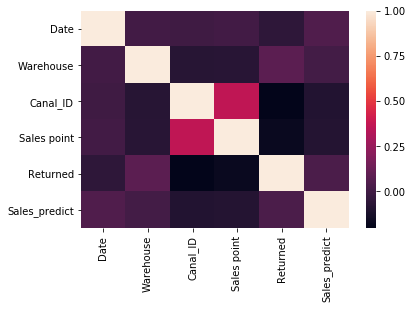

In [17]:
sb.heatmap(train.corr())

In [27]:
X = pd.get_dummies(train[['Date', 'Warehouse','Canal_ID','Sales point', 
                 'Product_type', 'Returned',]])
y = train['Sales_predict']

In [28]:
X.head()

,Date,Warehouse,Canal_ID,Sales point,Returned,Product_type_Chocolate,Product_type_Fresa,Product_type_Vainilla
0,3,1110,7,3303,5,1,0,0
1,3,1110,7,3303,5,0,1,0
2,3,1110,7,3303,5,0,0,1
3,3,1110,7,3305,17,0,1,0
4,3,1110,7,3305,14,0,0,1


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Sales_predict, dtype: int64

In [30]:
from sklearn.utils import shuffle

In [31]:
X, y = shuffle(X, y, random_state=2)

In [32]:
X.shape[0]

113755

In [33]:
x1, y1 = X[:37918], y[:37918]
x1.shape, y1.shape

((37918, 8), (37918,))

In [34]:
x2, y2 = X[37918:75836], y[37918:75836]
x2.shape, y2.shape

((37918, 8), (37918,))

In [35]:
x3, y3 = X[75836:113755], y[75836:113755]
x3.shape, y3.shape

((37919, 8), (37919,))

In [36]:
display(x1.head(2))
display(x2.head(2))
display(x3.head(2))

,Date,Warehouse,Canal_ID,Sales point,Returned,Product_type_Chocolate,Product_type_Fresa,Product_type_Vainilla
91816,8,2011,4,6617,17,0,0,1
16792,4,1114,2,57,30,1,0,0


,Date,Warehouse,Canal_ID,Sales point,Returned,Product_type_Chocolate,Product_type_Fresa,Product_type_Vainilla
89158,8,1617,1,4402,33,0,1,0
10998,3,2014,1,2807,29,0,0,1


,Date,Warehouse,Canal_ID,Sales point,Returned,Product_type_Chocolate,Product_type_Fresa,Product_type_Vainilla
59779,6,2014,1,4415,27,0,1,0
19385,4,1237,1,4463,26,0,1,0


### *Обучение случайного леса*

In [47]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {"n_estimators":2**np.arange(10)}
N = 2**np.arange(10)

In [49]:
RFR = RandomForestRegressor()
grd_srch = GridSearchCV(RFR, param_grid, cv = 3, verbose = 3)
total = grd_srch.fit(x1, y1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1 ..................................................
[CV] ........ n_estimators=1, score=0.33549881039743246, total=   0.0s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... n_estimators=1, score=0.4229330211222677, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ........ n_estimators=1, score=0.37934150580144815, total=   0.0s
[CV] n_estimators=2 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... n_estimators=2, score=0.5558457528979648, total=   0.1s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.5361753728648251, total=   0.1s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.4921825095598907, total=   0.1s
[CV] n_estimators=4 ..................................................
[CV] ......... n_estimators=4, score=0.6340614756485671, total=   0.3s
[CV] n_estimators=4 ..................................................
[CV] .......... n_estimators=4, score=0.609833325244009, total=   0.3s
[CV] n_estimators=4 ..................................................
[CV] ......... n_estimators=4, score=0.6155068376829774, total=   0.3s
[CV] n_estimators=8 ..................................................
[CV] ......... n_estimators=8, score=0.6502007450934439, total=   0.6s
[CV] n_estimators=8 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.9min finished


In [50]:
score = grd_srch.cv_results_['mean_test_score']
score

array([0.37925663, 0.52806861, 0.61980092, 0.65209807, 0.67486315,
       0.69030669, 0.69415815, 0.69629788, 0.69765832, 0.69674574])

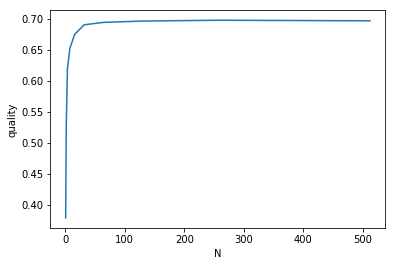

In [51]:
plt.plot(N, score)
plt.xlabel("N")
plt.ylabel("quality")
plt.show()

In [52]:
estimator = grd_srch.best_estimator_.n_estimators
estimator

256

In [53]:
param_grid_2 = {"max_features":2**np.arange(1, 4)}
N_2 = 2**np.arange(1, 4)

In [54]:
RFR = RandomForestRegressor(n_estimators = estimator)
grd_srch_2 = GridSearchCV(RFR, param_grid_2, cv = 3, verbose = 3)
total = grd_srch_2.fit(x1, y1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_features=2 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... max_features=2, score=0.5284949859061412, total=  11.6s
[CV] max_features=2 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s


[CV] .......... max_features=2, score=0.503632053686619, total=  12.0s
[CV] max_features=2 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.4s remaining:    0.0s


[CV] .......... max_features=2, score=0.539442458545213, total=  12.9s
[CV] max_features=4 ..................................................
[CV] ......... max_features=4, score=0.6345413337545203, total=  20.3s
[CV] max_features=4 ..................................................
[CV] ......... max_features=4, score=0.6119448642953647, total=  16.0s
[CV] max_features=4 ..................................................
[CV] ......... max_features=4, score=0.6461465508302583, total=  14.4s
[CV] max_features=8 ..................................................
[CV] ........... max_features=8, score=0.70058633307578, total=  22.9s
[CV] max_features=8 ..................................................
[CV] ......... max_features=8, score=0.6770676325241609, total=  22.7s
[CV] max_features=8 ..................................................
[CV] ......... max_features=8, score=0.7124212702219943, total=  22.6s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.0min finished


In [55]:
score_2 = grd_srch_2.cv_results_['mean_test_score']
score_2

array([0.52385662, 0.63087768, 0.69669185])

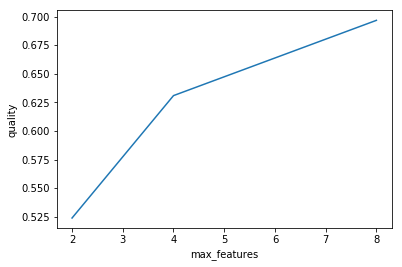

In [56]:
plt.plot(N_2, score_2)
plt.xlabel("max_features")
plt.ylabel("quality")
plt.show()

In [57]:
features = grd_srch_2.best_estimator_.max_features
features

8

In [58]:
param_grid_3 = {"max_depth":np.arange(1, 9, 2), "min_samples_leaf":[1, 3, 9, 27], "min_samples_split":[3, 9, 27, 81]}

In [59]:
RFR = RandomForestRegressor(n_estimators = estimator, max_features = features)
grd_srch_3 = GridSearchCV(RFR, param_grid_3, cv = 3, verbose = 3)
total = grd_srch_3.fit(x1, y1)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.1422643918368417, total=   1.7s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.11789857100824463, total=   1.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.13099173082837068, total=   1.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.14229089124147387, total=   1.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.11791213859889349, total=   1.7s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.13097673562857703, total=   1.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=27, score=0.14226697262077048, total=   1.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=27, score=0.11792360928895862, total=   1.5s
[CV] max_depth=1, min_samples_leaf=1,

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.2927950937356174, total=   4.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=9, score=0.30405169107961494, total=   3.8s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=9, score=0.26681725942740164, total=   4.0s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=9, score=0.2925009081135054, total=   3.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=27, score=0.30427852783082476, total=   3.7s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=27, score=0.267521153455184, total=   3.8s
[CV] max_depth=3, min_samples_leaf=1, min

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.37249621379746756, total=   6.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=9, score=0.3800141350605434, total=   5.8s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=9, score=0.3523876524102161, total=   5.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=9, score=0.3707426364196558, total=   5.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=27, score=0.3747004534243181, total=   5.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=27, score=0.3466499911066034, total=   5.7s
[CV] max_depth=5, min_samples_leaf=1, min_

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.46506544434618946, total=   7.7s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.48152271177211964, total=   7.7s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.4500366207191638, total=   7.7s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=9, score=0.465551115604316, total=   7.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=27, score=0.4696770115318017, total=   7.6s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=27, score=0.43343329963436755, total=   7.6s
[CV] max_depth=7, min_samples_leaf=1, min

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 16.6min finished


In [60]:
depth = grd_srch_3.best_estimator_.max_depth
leaf = grd_srch_3.best_estimator_.min_samples_leaf
split = grd_srch_3.best_estimator_.min_samples_split
depth, leaf, split

(7, 1, 3)

In [61]:
RFR = RandomForestRegressor(n_estimators = estimator, max_features = features, max_depth = depth, 
                            min_samples_leaf = leaf, min_samples_split = split)
RFR.fit(x1, y1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=256, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred_RFR = RFR.predict(x2)
r2_score(y2, y_pred_RFR, multioutput='uniform_average')

0.451536642393099

### *Обучение градиентного бустинга*

In [63]:
param_grid_4 = {"n_estimators":2**np.arange(10), "learning_rate":0.1**np.arange(5)}
ne = 2**np.arange(10)
lr = 0.1**np.arange(5)

In [64]:
GBR = GradientBoostingRegressor()
grdsearch = GridSearchCV(GBR, param_grid_4, cv = 3, verbose = 3)
grdsearch.fit(x1, y1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] learning_rate=1.0, n_estimators=1 ...............................
[CV]  learning_rate=1.0, n_estimators=1, score=0.2896931508306877, total=   0.0s
[CV] learning_rate=1.0, n_estimators=1 ...............................
[CV]  learning_rate=1.0, n_estimators=1, score=0.25918108864752787, total=   0.0s
[CV] learning_rate=1.0, n_estimators=1 ...............................
[CV]  learning_rate=1.0, n_estimators=1, score=0.2815064245471727, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] learning_rate=1.0, n_estimators=2 ...............................
[CV]  learning_rate=1.0, n_estimators=2, score=0.36144400765375106, total=   0.0s
[CV] learning_rate=1.0, n_estimators=2 ...............................
[CV]  learning_rate=1.0, n_estimators=2, score=0.284330568848854, total=   0.0s
[CV] learning_rate=1.0, n_estimators=2 ...............................
[CV]  learning_rate=1.0, n_estimators=2, score=0.30720388884154126, total=   0.0s
[CV] learning_rate=1.0, n_estimators=4 ...............................
[CV]  learning_rate=1.0, n_estimators=4, score=0.39671589276521874, total=   0.0s
[CV] learning_rate=1.0, n_estimators=4 ...............................
[CV]  learning_rate=1.0, n_estimators=4, score=0.33701085459804947, total=   0.0s
[CV] learning_rate=1.0, n_estimators=4 ...............................
[CV]  learning_rate=1.0, n_estimators=4, score=0.36690580574122256, total=   0.0s
[CV] learning_rate=1.0, n_estimators=8 ...............................
[CV]  learni

[CV]  learning_rate=0.1, n_estimators=512, score=0.5696223771986342, total=   6.4s
[CV] learning_rate=0.1, n_estimators=512 .............................
[CV]  learning_rate=0.1, n_estimators=512, score=0.524426442512208, total=   6.4s
[CV] learning_rate=0.1, n_estimators=512 .............................
[CV]  learning_rate=0.1, n_estimators=512, score=0.545296823458822, total=   6.5s
[CV] learning_rate=0.010000000000000002, n_estimators=1 ..............
[CV]  learning_rate=0.010000000000000002, n_estimators=1, score=0.005624199031254884, total=   0.0s
[CV] learning_rate=0.010000000000000002, n_estimators=1 ..............
[CV]  learning_rate=0.010000000000000002, n_estimators=1, score=0.004882346052563991, total=   0.0s
[CV] learning_rate=0.010000000000000002, n_estimators=1 ..............
[CV]  learning_rate=0.010000000000000002, n_estimators=1, score=0.005538800458133153, total=   0.0s
[CV] learning_rate=0.010000000000000002, n_estimators=2 ..............
[CV]  learning_rate=0.01000

[CV]  learning_rate=0.0010000000000000002, n_estimators=32, score=0.01557180197202601, total=   0.4s
[CV] learning_rate=0.0010000000000000002, n_estimators=32 ............
[CV]  learning_rate=0.0010000000000000002, n_estimators=32, score=0.017322470882389918, total=   0.4s
[CV] learning_rate=0.0010000000000000002, n_estimators=64 ............
[CV]  learning_rate=0.0010000000000000002, n_estimators=64, score=0.03590332085647463, total=   0.8s
[CV] learning_rate=0.0010000000000000002, n_estimators=64 ............
[CV]  learning_rate=0.0010000000000000002, n_estimators=64, score=0.030365856408110067, total=   0.8s
[CV] learning_rate=0.0010000000000000002, n_estimators=64 ............
[CV]  learning_rate=0.0010000000000000002, n_estimators=64, score=0.03362495685051903, total=   0.8s
[CV] learning_rate=0.0010000000000000002, n_estimators=128 ...........
[CV]  learning_rate=0.0010000000000000002, n_estimators=128, score=0.06790782680740104, total=   1.7s
[CV] learning_rate=0.001000000000000

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32), 'learning_rate': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [65]:
scoregbr = grdsearch.cv_results_['mean_test_score']

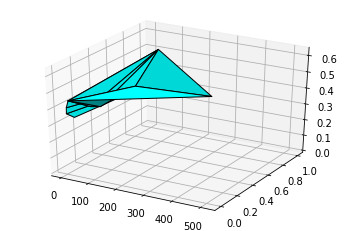

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = list(ne) * lr.shape[0]
Y = list(lr) * ne.shape[0]
ax.plot_trisurf(X, Y, scoregbr, color = '#00FFFF', edgecolor = 'black')

In [67]:
estimatorgbr = grdsearch.best_estimator_.n_estimators
lr = grdsearch.best_estimator_.learning_rate
estimatorgbr, lr

(512, 1.0)

In [68]:
param_grid = {"max_depth":np.arange(1, 9)}

In [69]:
GBR = GradientBoostingRegressor(n_estimators = estimatorgbr, learning_rate = lr)
grdsearch = GridSearchCV(GBR, param_grid, cv = 3, verbose = 3)
grdsearch.fit(x1, y1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... max_depth=1, score=0.44110902406367347, total=   2.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ............ max_depth=1, score=0.3702896793972734, total=   2.3s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] ........... max_depth=1, score=0.41623716174598696, total=   2.3s
[CV] max_depth=2 .....................................................
[CV] ............ max_depth=2, score=0.5663997173217679, total=   4.1s
[CV] max_depth=2 .....................................................
[CV] ............ max_depth=2, score=0.5422211472942642, total=   4.1s
[CV] max_depth=2 .....................................................
[CV] ............ max_depth=2, score=0.5627926518526059, total=   4.0s
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6479371891115602, total=   6.5s
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6204550611385888, total=   6.5s
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6397770158429429, total=   6.8s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [70]:
scoregbr_2 = grdsearch.cv_results_['mean_test_score']

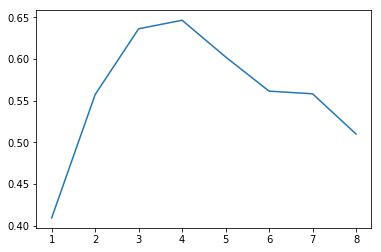

In [71]:
plt.plot(np.arange(1, 9), scoregbr_2)

In [72]:
depthgbr = grdsearch.best_estimator_.max_depth
depthgbr

4

In [73]:
param_grid = {"max_features":2**np.arange(1, 4), "min_samples_leaf":[1, 3, 9, 27], 
              "min_samples_split":[3, 9, 27, 81]}

In [74]:
GBR = GradientBoostingRegressor(n_estimators = estimatorgbr, learning_rate = lr, max_depth = depthgbr)
grdsearch = GridSearchCV(GBR, param_grid, cv = 3, verbose = 3)
grdsearch.fit(x1, y1)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_features=2, min_samples_leaf=1, min_samples_split=3 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=2, min_samples_leaf=1, min_samples_split=3, score=0.6019220427113596, total=   4.3s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=3 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  max_features=2, min_samples_leaf=1, min_samples_split=3, score=0.59027752635167, total=   4.3s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=3 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV]  max_features=2, min_samples_leaf=1, min_samples_split=3, score=0.5981820343673822, total=   4.3s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=9, score=0.572707105322871, total=   4.3s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=9, score=0.6049582623781119, total=   4.2s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=9, score=0.6039391621623178, total=   4.2s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=27 ........
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=27, score=0.5836681917550199, total=   4.3s
[CV] max_features=2, min_samples_leaf=1, min_samples_split=27 ........
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=27, score=0.5748520440786009, total=   4.2s
[CV] max_features=2, min_s

[CV]  max_features=4, min_samples_leaf=1, min_samples_split=3, score=0.6125248948160573, total=   6.0s
[CV] max_features=4, min_samples_leaf=1, min_samples_split=3 .........
[CV]  max_features=4, min_samples_leaf=1, min_samples_split=3, score=0.661462147159712, total=   5.9s
[CV] max_features=4, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=4, min_samples_leaf=1, min_samples_split=9, score=0.6275982511116529, total=   5.9s
[CV] max_features=4, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=4, min_samples_leaf=1, min_samples_split=9, score=0.6213356064722195, total=   6.0s
[CV] max_features=4, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=4, min_samples_leaf=1, min_samples_split=9, score=0.6254342339468146, total=   5.9s
[CV] max_features=4, min_samples_leaf=1, min_samples_split=27 ........
[CV]  max_features=4, min_samples_leaf=1, min_samples_split=27, score=0.6291293100303372, total=   5.9s
[CV] max_features=4, min_sa

[CV]  max_features=8, min_samples_leaf=1, min_samples_split=3, score=0.6349226638274208, total=   9.2s
[CV] max_features=8, min_samples_leaf=1, min_samples_split=3 .........
[CV]  max_features=8, min_samples_leaf=1, min_samples_split=3, score=0.649441926931172, total=   9.2s
[CV] max_features=8, min_samples_leaf=1, min_samples_split=3 .........
[CV]  max_features=8, min_samples_leaf=1, min_samples_split=3, score=0.6576551526039695, total=   9.2s
[CV] max_features=8, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=8, min_samples_leaf=1, min_samples_split=9, score=0.6720135770620401, total=   9.4s
[CV] max_features=8, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=8, min_samples_leaf=1, min_samples_split=9, score=0.6588989093343351, total=   9.9s
[CV] max_features=8, min_samples_leaf=1, min_samples_split=9 .........
[CV]  max_features=8, min_samples_leaf=1, min_samples_split=9, score=0.6394176746999441, total=   9.1s
[CV] max_features=8, min_sam

[CV]  max_features=8, min_samples_leaf=27, min_samples_split=81, score=0.6452255252212529, total=   8.5s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 16.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([2, 4, 8], dtype=int32), 'min_samples_leaf': [1, 3, 9, 27], 'min_samples_split': [3, 9, 27, 81]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [75]:
featuresgbr = grdsearch.best_estimator_.max_features
leafgbr = grdsearch.best_estimator_.min_samples_leaf
splitgbr = grdsearch.best_estimator_.min_samples_split
featuresgbr, leafgbr, splitgbr

(8, 3, 3)

In [76]:
GBR = GradientBoostingRegressor(n_estimators = estimatorgbr, learning_rate = lr, max_depth = depthgbr, 
                                max_features = featuresgbr, min_samples_leaf = leafgbr, min_samples_split = splitgbr)
GBR.fit(x1, y1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=4, max_features=8,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=512, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
y_pred_GBR = GBR.predict(x2)
r2_score(y2, y_pred_GBR, multioutput='uniform_average')

0.680514853480782

### Блендинг

In [78]:
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [79]:
KNN1 = KNeighborsRegressor(n_neighbors=3)
KNN1.fit(x1, y1)
KNN1_pred_x2 = KNN1.predict(x2)
KNN1_pred_x3 = KNN1.predict(x3)

KNN2 = KNeighborsRegressor(n_neighbors=10)
KNN2.fit(x1, y1)
KNN2_pred_x2 = KNN2.predict(x2)
KNN2_pred_x3 = KNN2.predict(x3)

RG0 = Ridge(alpha=0.01)
RG0.fit(x1, y1)
RG0_pred_x2 = RG0.predict(x2)
RG0_pred_x3 = RG0.predict(x3)

RG1 = Ridge(alpha=1.1)
RG1.fit(x1, y1)
RG1_pred_x2 = RG1.predict(x2)
RG1_pred_x3 = RG1.predict(x3)

RG2 = Ridge(alpha=100.1)
RG2.fit(x1, y1)
RG2_pred_x2 = RG1.predict(x2)
RG2_pred_x3 = RG1.predict(x3)

RFR1 = RandomForestRegressor(n_estimators = estimator, max_features = features, max_depth = depth, 
                            min_samples_leaf = leaf, min_samples_split = split)
RFR1.fit(x1, y1)
RFR1_pred_x2 = RFR1.predict(x2)
RFR1_pred_x3 = RFR1.predict(x3)

RFR2 = RandomForestRegressor(n_estimators=100, max_depth=5)
RFR2.fit(x1, y1)
RFR2_pred_x2 = RFR2.predict(x2)
RFR2_pred_x3 = RFR2.predict(x3)

GBR1 = GradientBoostingRegressor(n_estimators = estimatorgbr, learning_rate = lr, max_depth = depthgbr, 
                                max_features = featuresgbr, min_samples_leaf = leafgbr, min_samples_split = splitgbr)
GBR1.fit(x1, y1)
GBR1_pred_x2 = GBR1.predict(x2)
GBR1_pred_x3 = GBR1.predict(x3)

LGBM1 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.05, max_depth=2,
                         n_estimators=200, nthread=-1, objective='regression')    
LGBM1.fit(x1, y1)
LGBM1_pred_x2 = LGBM1.predict(x2)
LGBM1_pred_x3 = LGBM1.predict(x3)

LGBM2 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.05, max_depth=5, 
                         n_estimators=200, nthread=-1, objective='regression')    
LGBM2.fit(x1, y1)
LGBM2_pred_x2 = LGBM2.predict(x2)
LGBM2_pred_x3 = LGBM2.predict(x3)

In [80]:
Y_pred_x2 = pd.DataFrame(KNN1_pred_x2)
Y_pred_x2.loc[:, 'KNN2_pred'], Y_pred_x2.loc[:,'RG0_pred'], Y_pred_x2.loc[:, 'RG1_pred'] = KNN2_pred_x2, RG0_pred_x2, RG1_pred_x2
Y_pred_x2.loc[:, 'RG2_pred'], Y_pred_x2.loc[:,'RFR1_pred'], Y_pred_x2.loc[:, 'RFR2_pred'] = RG2_pred_x2, RFR1_pred_x2, RFR2_pred_x2
Y_pred_x2.loc[:, 'LGBM12_pred'], Y_pred_x2.loc[:,'LGBM2_pred'], Y_pred_x2.loc[:, 'GBR_pred'] = LGBM1_pred_x2, LGBM2_pred_x2, GBR1_pred_x2

In [81]:
Y_pred_x3 = pd.DataFrame(KNN1_pred_x3)
Y_pred_x3.loc[:, 'KNN2_pred'], Y_pred_x3.loc[:,'RG0_pred'], Y_pred_x3.loc[:, 'RG1_pred'] = KNN2_pred_x3, RG0_pred_x3, RG1_pred_x3
Y_pred_x3.loc[:, 'RG2_pred'], Y_pred_x3.loc[:,'RFR1_pred'], Y_pred_x3.loc[:, 'RFR2_pred'] = RG2_pred_x3, RFR1_pred_x3, RFR2_pred_x3
Y_pred_x3.loc[:, 'LGBM12_pred'], Y_pred_x3.loc[:,'LGBM2_pred'], Y_pred_x3.loc[:, 'GBR_pred']  = LGBM1_pred_x3, LGBM2_pred_x3, GBR1_pred_x3

In [82]:
LR = LinearRegression()
LR.fit(Y_pred_x2, y2)
LR_pred = LR.predict(Y_pred_x3)

In [83]:
r2_score(y3, LR_pred, multioutput='uniform_average')

0.6831220778199154

In [85]:
MSE = sklearn.metrics.mean_squared_error(y3, LR_pred)
MSE

650.0475628921878

In [86]:
MAE = sklearn.metrics.mean_absolute_error(y3, LR_pred)
MAE

14.420634086445952

### Прогноз запасов

In [88]:
x3['Shipped_pred'] = LR_pred

In [94]:
x3.head()

,Week,Storage_ID,Canal_ID,Route_ID,Returned,Submarinos_Chocolate,Submarinos_Fresa,Submarinos_Vainilla,Shipped_pred
59779,6,2014,1,4415,0,0,1,0,47.322599
19385,4,1237,1,4463,0,0,1,0,27.781611
52758,6,1333,1,2023,4,0,0,1,62.815371
31443,4,3213,1,4416,0,1,0,0,49.088015
70226,7,1384,1,2822,0,0,0,1,56.055807


In [99]:
for val, cnt in x3.Canal_ID.value_counts().to_dict().items():
    print('Значение %r встречается в колонке Canal_ID обучающей выборки %d раз!' % (val, cnt))

Значение 1 встречается в колонке Canal_ID обучающей выборки 26492 раз!
Значение 4 встречается в колонке Canal_ID обучающей выборки 5550 раз!
Значение 11 встречается в колонке Canal_ID обучающей выборки 2362 раз!
Значение 2 встречается в колонке Canal_ID обучающей выборки 1420 раз!
Значение 7 встречается в колонке Canal_ID обучающей выборки 1290 раз!
Значение 6 встречается в колонке Canal_ID обучающей выборки 586 раз!
Значение 8 встречается в колонке Canal_ID обучающей выборки 177 раз!
Значение 5 встречается в колонке Canal_ID обучающей выборки 42 раз!


In [90]:
x3.to_csv('Prediction.csv')

In [105]:
df = pd.read_excel('Prediction.xlsx')

In [106]:
df.head()

,Date,Week,Storage_ID,Canal_ID,Route_ID,Submarinos,Returned,Shipped_pred
0,2019-06-01 00:00:00,3,2653,1,2016,Chocolate,0,122.983387
1,2019-06-01 00:00:00,3,1632,1,4402,Fresa,2,47.711823
2,2019-06-01 00:00:00,3,1628,1,4456,Vainilla,1,38.578049
3,2019-06-02 00:00:00,3,2267,7,3304,Chocolate,0,13.309024
4,2019-06-02 00:00:00,3,1114,2,58,Fresa,1,34.431077


In [108]:
np.sum(df[df['Submarinos'] == 'Fresa'].Shipped_pred)

619745.6647925307

In [109]:
np.sum(df[df['Submarinos'] == 'Chocolate'].Shipped_pred)

394822.45306015876

In [110]:
np.sum(df[df['Submarinos'] == 'Vainilla'].Shipped_pred)

597793.5247586182

In [114]:
for val, cnt in df[df['Submarinos'] == 'Chocolate'].Canal_ID.value_counts().to_dict().items():
    print('Значение %r встречается в колонке Canal_ID обучающей выборки %d раз!' % (val, cnt))

Значение 1 встречается в колонке Canal_ID обучающей выборки 6455 раз!
Значение 4 встречается в колонке Canal_ID обучающей выборки 1375 раз!
Значение 11 встречается в колонке Canal_ID обучающей выборки 590 раз!
Значение 2 встречается в колонке Canal_ID обучающей выборки 368 раз!
Значение 7 встречается в колонке Canal_ID обучающей выборки 323 раз!
Значение 6 встречается в колонке Canal_ID обучающей выборки 141 раз!
Значение 8 встречается в колонке Canal_ID обучающей выборки 44 раз!
Значение 5 встречается в колонке Canal_ID обучающей выборки 6 раз!
